In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [7]:
df.rename(columns={'old_col_name': 'new_col_name'})

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.columns =['CustomerID','Gender','Age','Annual_Income_(k$)','Spending_Score_(1-100)']

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)',
       'Spending_Score_(1-100)'],
      dtype='object')

In [10]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: xlabel='Gender'>

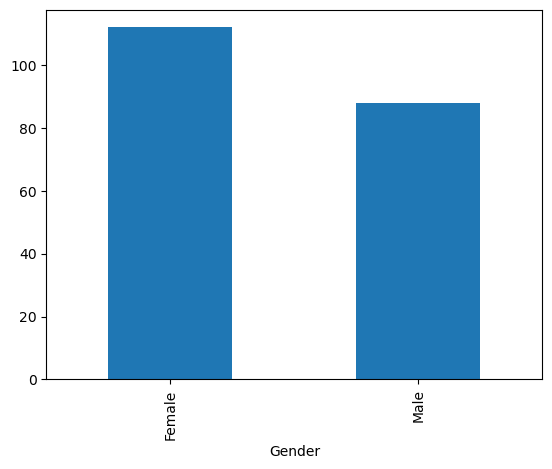

In [11]:
df['Gender'].value_counts().plot(kind ='bar')

<Axes: xlabel='Gender', ylabel='count'>

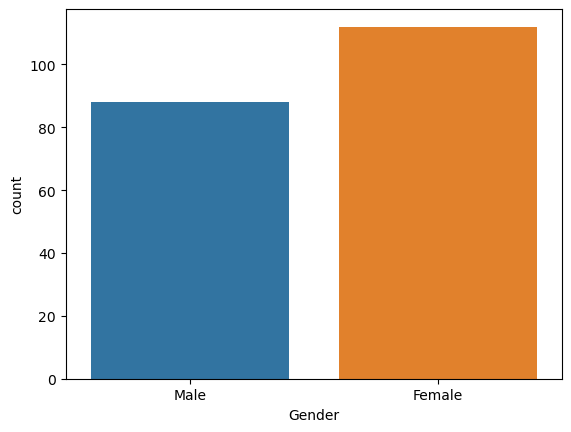

In [12]:
sns.countplot(data =df, x='Gender')

In [13]:
num_feature_list =[f for f in df.columns if df.dtypes[f]=='int64']

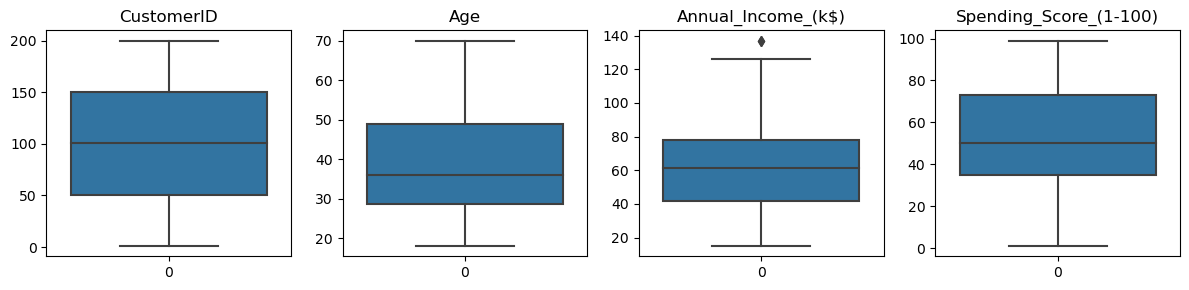

In [14]:
fig, axes =plt.subplots(ncols= 4 , figsize= (12,3))
for column, axis in zip(num_feature_list[:4],axes):
    sns.boxplot(data = df[column],ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

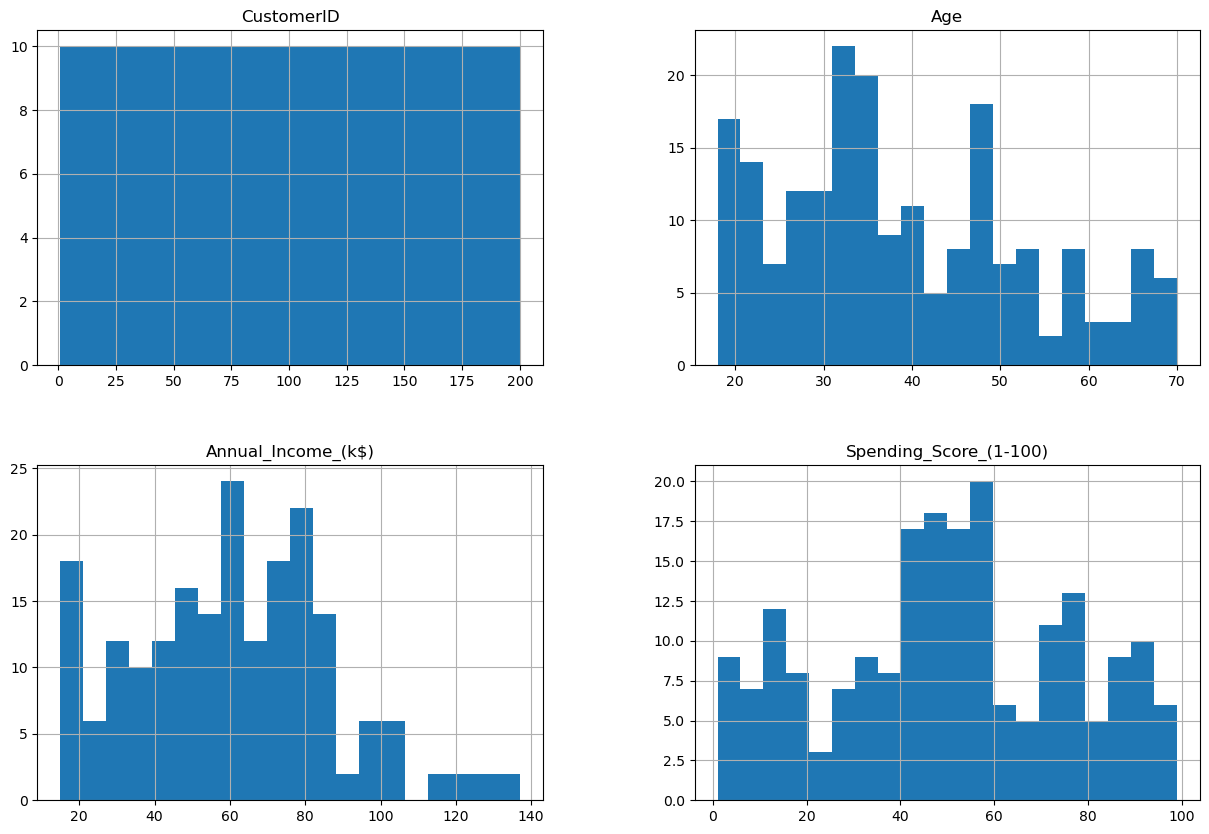

In [15]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

<Axes: xlabel='Annual_Income_(k$)', ylabel='Age'>

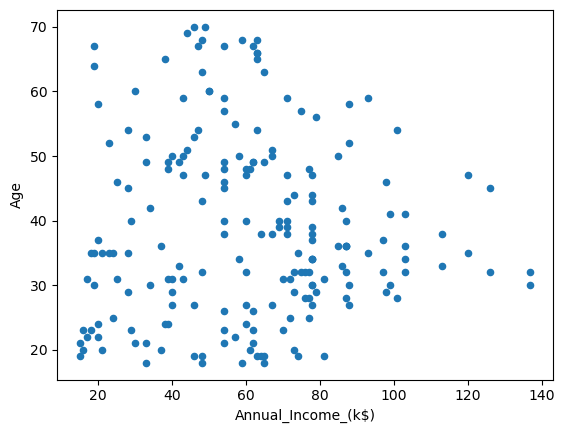

In [16]:
df.plot(kind='scatter', x='Annual_Income_(k$)', y='Age')

<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score_(1-100)'>

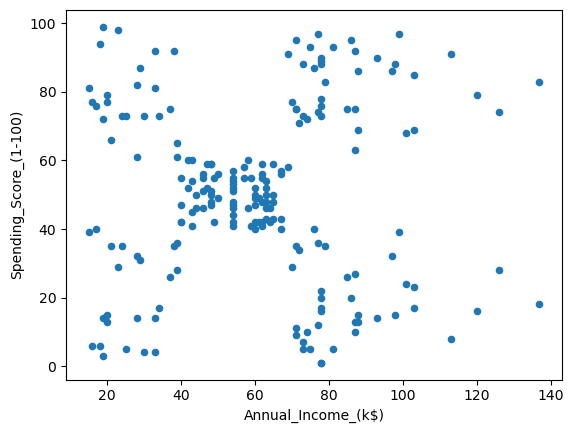

In [17]:
df.plot(kind='scatter', x='Annual_Income_(k$)', y='Spending_Score_(1-100)')

<Axes: xlabel='Age', ylabel='Spending_Score_(1-100)'>

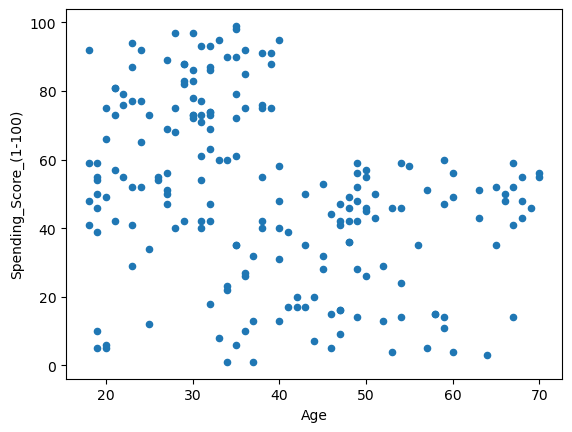

In [18]:
df.plot(kind='scatter', x='Age', y='Spending_Score_(1-100)')

In [19]:
coreletion =df[['Age','Spending_Score_(1-100)','Annual_Income_(k$)','CustomerID']].corr()
coreletion

,Age,Spending_Score_(1-100),Annual_Income_(k$),CustomerID
Age,1.000000,-0.327227,-0.012398,-0.026763
Spending_Score_(1-100),-0.327227,1.000000,0.009903,0.013835
Annual_Income_(k$),-0.012398,0.009903,1.000000,0.977548
CustomerID,-0.026763,0.013835,0.977548,1.000000


<Axes: >

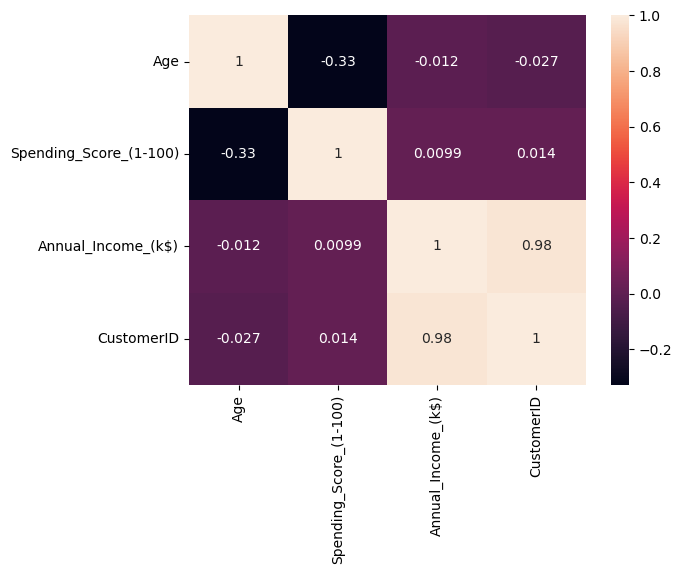

In [20]:
sns.heatmap(coreletion,annot=True)

In [21]:
X = df.iloc[:,[3,4]].values

In [22]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [24]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

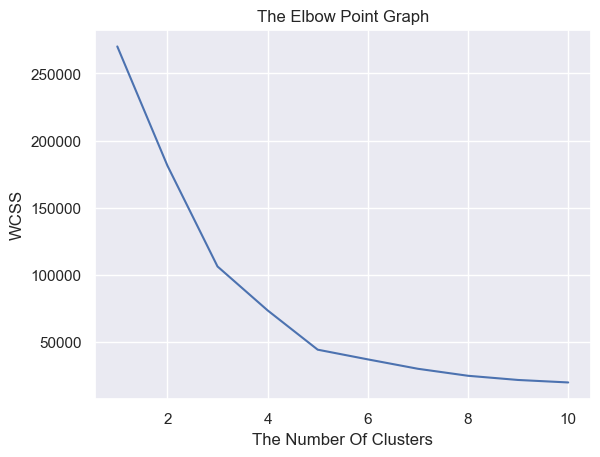

In [25]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('The Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


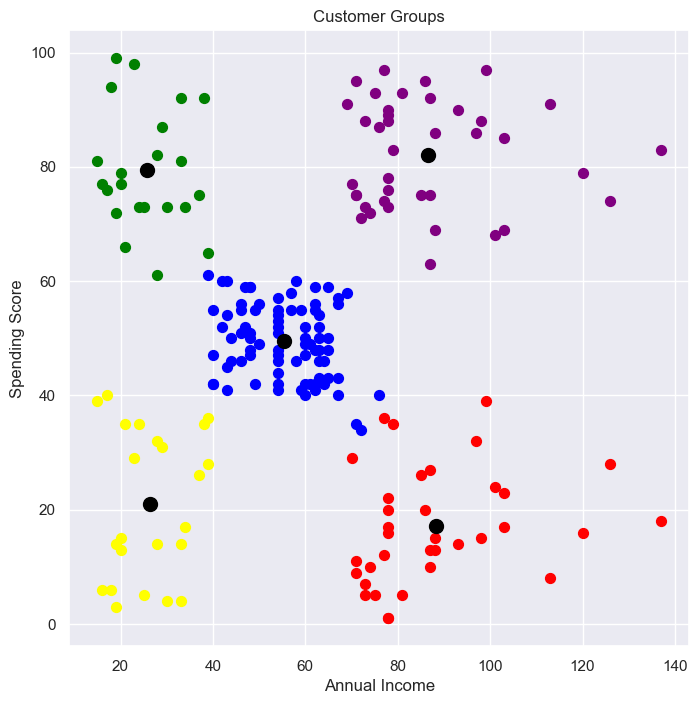

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='blue',label='Cluster_1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='purple',label='Cluster_2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='red',label='Cluster_3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='yellow',label='Cluster_4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='green',label='Cluster_5')

# plot the centorids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centorids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()